In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

In [ ]:
def Solver(y0, t0, T, f, N):
    ys = [y0]
    ts = [t0]
    dt = (T - t0) / N

    while ts[-1] < T:
        t, y = ts[-1], ys[-1]
        k1 = f(t, y)
        k2 = f(t+dt,y+dt*k1)
        ys.append(y + dt/2*(k1+k2))
        ts.append(t + dt)

    return np.array(ts), np.array(ys)

In [62]:
r0 = 2
gamma = 1/18
beta = r0*gamma

S0 = 1-I0
I0 = 1 / 200_000
R0 = 0

y0 = np.array([S0, I0, R0])
t0 = 0
T = 1000

N = 1_000

In [63]:
def f(t, y):
    return np.array([-beta*y[0]*y[1],
                     beta*y[0]*y[1] - gamma*y[1],
                     gamma*y[1]])

[[9.99995000e-01 5.00000000e-06 0.00000000e+00]
 [9.99994444e-01 5.27777500e-06 2.77777778e-07]
 [9.99993858e-01 5.57098146e-06 5.70987500e-07]
 ...
 [2.00067524e-01 1.66806693e-12 7.99932476e-01]
 [2.00067524e-01 1.61247721e-12 7.99932476e-01]
 [2.00067524e-01 1.55874007e-12 7.99932476e-01]]


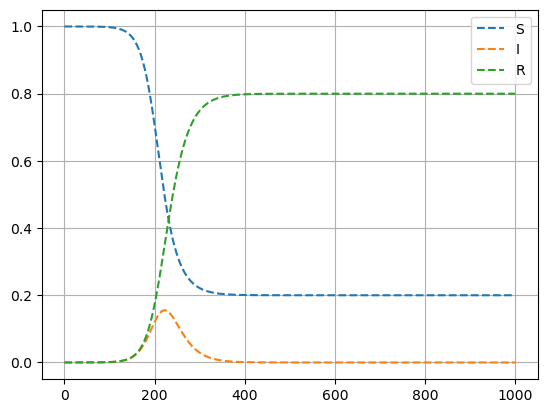

In [67]:
t, y = Solver(y0, t0, T, f, N)
print(y)
plt.plot(t, y[:, 0], "--", label="S")
plt.plot(t, y[:, 1], "--", label="I")
plt.plot(t, y[:, 2], "--", label="R")
plt.legend()
plt.grid()
plt.show()